Import all your packages

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Load your database into a frame

In [42]:
s_df = pd.read_csv("StudentsPerformance.csv")
s_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Select two columns to use for a SLR

In [44]:
x = "reading score"
y = "writing score"

slr = s_df[[x, y]]
slr.head()

,reading score,writing score
0,72,74
1,90,88
2,95,93
3,57,44
4,78,75


Check that the relationship is linear

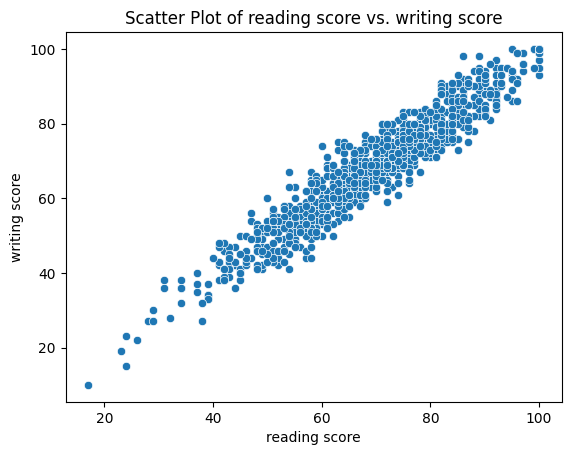

In [45]:
plt.figure()
sns.scatterplot(slr, x = x, y = y)
plt.xlabel(x)
plt.ylabel(y)
plt.title('Scatter Plot of {} vs. {}'.format(x, y))
plt.show()
plt.close()

Prepare the data for slr
- X data needs to be (n_samples, n_features) [rows by columns]
- Y data needs to be (n_samples)

In [46]:
X_features = s_df[x].values.reshape(-1, 1)
print(X_features)
y_true = s_df[y].values

[[ 72]
 [ 90]
 [ 95]
 [ 57]
 [ 78]
 [ 83]
 [ 95]
 [ 43]
 [ 64]
 [ 60]
 [ 54]
 [ 52]
 [ 81]
 [ 72]
 [ 53]
 [ 75]
 [ 89]
 [ 32]
 [ 42]
 [ 58]
 [ 69]
 [ 75]
 [ 54]
 [ 73]
 [ 71]
 [ 74]
 [ 54]
 [ 69]
 [ 70]
 [ 70]
 [ 74]
 [ 65]
 [ 72]
 [ 42]
 [ 87]
 [ 81]
 [ 81]
 [ 64]
 [ 90]
 [ 56]
 [ 61]
 [ 73]
 [ 58]
 [ 65]
 [ 56]
 [ 54]
 [ 65]
 [ 71]
 [ 74]
 [ 84]
 [ 55]
 [ 69]
 [ 44]
 [ 78]
 [ 84]
 [ 41]
 [ 85]
 [ 55]
 [ 59]
 [ 17]
 [ 74]
 [ 39]
 [ 61]
 [ 80]
 [ 58]
 [ 64]
 [ 37]
 [ 72]
 [ 58]
 [ 64]
 [ 63]
 [ 55]
 [ 51]
 [ 57]
 [ 49]
 [ 41]
 [ 26]
 [ 78]
 [ 74]
 [ 68]
 [ 49]
 [ 45]
 [ 47]
 [ 64]
 [ 39]
 [ 80]
 [ 83]
 [ 71]
 [ 70]
 [ 86]
 [ 72]
 [ 34]
 [ 79]
 [ 45]
 [ 86]
 [ 81]
 [ 66]
 [ 72]
 [ 67]
 [ 67]
 [ 67]
 [ 74]
 [ 91]
 [ 44]
 [ 86]
 [ 67]
 [100]
 [ 63]
 [ 76]
 [ 64]
 [ 89]
 [ 55]
 [ 53]
 [ 58]
 [100]
 [ 77]
 [ 85]
 [ 82]
 [ 63]
 [ 69]
 [ 92]
 [ 89]
 [ 93]
 [ 57]
 [ 80]
 [ 95]
 [ 68]
 [ 77]
 [ 82]
 [ 49]
 [ 84]
 [ 37]
 [ 74]
 [ 81]
 [ 79]
 [ 55]
 [ 54]
 [ 55]
 [ 66]
 [ 61]
 [ 72]
 [ 62]
 [ 55]

Creating and fitting the linear regression model

In [47]:
simple_model = LinearRegression()
simple_model.fit(X_features, y_true)

LinearRegression()

Use the model to predict y values for the original x data

In [48]:
y_pred = simple_model.predict(X_features)

Plot the predicted values on the same set of axes

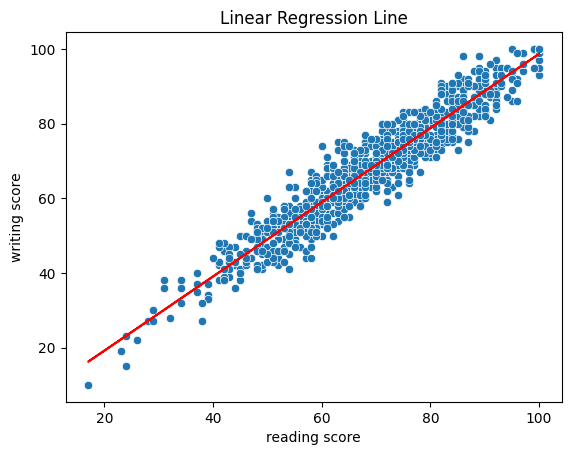

In [49]:
plt.figure()
sns.scatterplot(slr, x = x, y = y)
plt.plot(X_features, y_pred, color='red')
plt.xlabel(x)
plt.ylabel(y)
plt.title('Linear Regression Line')
plt.show()
plt.close()

Evaluate the model using the evaluation metrics 
- Note the units for MSE here

In [50]:
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Evaluation Metrics:
Mean Squared Error (MSE): 20.47086368938935
R-squared (R2) Score: 0.9112574888913137
